In [1]:
"""

### Assignment 6: 2D FFT and Image Frequency Analysis
**Duration:** 90-105 minutes  
**Difficulty:** ⭐⭐⭐⭐☆

#### Objectives
- Extend FFT concepts to 2D images
- Understand image frequency domain characteristics
- Master 2D frequency domain visualization

#### Tasks
1. **2D FFT implementation and visualization:**
   ```python
   def analyze_image_spectrum(image):
       # Compute 2D FFT
       fft_image = np.fft.fft2(image)
       fft_shifted = np.fft.fftshift(fft_image)
       
       # Visualize magnitude and phase
       magnitude = np.log(np.abs(fft_shifted) + 1)
       phase = np.angle(fft_shifted)
       
       return magnitude, phase
   ```

2. **Image types analysis:**
   - Natural images (photos, textures)
   - Synthetic images (geometric patterns)
   - Test patterns (checkerboard, sinusoidal gratings)
   - Compare frequency domain characteristics

3. **Frequency domain interpretation:**
   - Identify DC component (average intensity)
   - Low frequency regions (smooth variations)
   - High frequency regions (edges, details)
   - Directional frequency content

4. **Phase vs magnitude importance:**
   - Reconstruct images using only magnitude
   - Reconstruct images using only phase
   - Swap magnitude/phase between different images
   - Demonstrate phase importance for perception

#### Expected Output
- Functions: `analyze_image_spectrum()`, `reconstruct_from_components()`
- Plots: 2D FFT visualizations, phase/magnitude comparisons
- Analysis: Report on different image types' spectral characteristics

#### Key Insights to Gain
- Images have predictable frequency domain structure
- Phase contains most spatial information
- Different image types have distinct spectral signatures

"""

"\n\n### Assignment 6: 2D FFT and Image Frequency Analysis\n**Duration:** 90-105 minutes  \n**Difficulty:** ⭐⭐⭐⭐☆\n\n#### Objectives\n- Extend FFT concepts to 2D images\n- Understand image frequency domain characteristics\n- Master 2D frequency domain visualization\n\n#### Tasks\n1. **2D FFT implementation and visualization:**\n   ```python\n   def analyze_image_spectrum(image):\n       # Compute 2D FFT\n       fft_image = np.fft.fft2(image)\n       fft_shifted = np.fft.fftshift(fft_image)\n\n       # Visualize magnitude and phase\n       magnitude = np.log(np.abs(fft_shifted) + 1)\n       phase = np.angle(fft_shifted)\n\n       return magnitude, phase\n   ```\n\n2. **Image types analysis:**\n   - Natural images (photos, textures)\n   - Synthetic images (geometric patterns)\n   - Test patterns (checkerboard, sinusoidal gratings)\n   - Compare frequency domain characteristics\n\n3. **Frequency domain interpretation:**\n   - Identify DC component (average intensity)\n   - Low frequency r

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import typing

In [3]:
vehicle = cv.imread('/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/images/calibration/vehicle_advancing_01.png', cv.IMREAD_GRAYSCALE)
geo_pattern = cv.imread('/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/images/image_geom_pattern.png', cv.IMREAD_GRAYSCALE)
sin_grating = cv.imread('/Users/agerasymchuk/private_repo/cv_claude_course/cv_course/images/synthetic_sinusoidal_grating.png', cv.IMREAD_GRAYSCALE)


images = [
    ('vehicle', vehicle),
    ('geo_pattern', geo_pattern),
    ('sin_grating', sin_grating),
]



In [4]:

def plot_function(
    x: np.ndarray, 
    y: np.ndarray, 
    title: str, 
    x_title: str | None = None, 
    y_title: str | None = None
):
    fig, ax = plt.subplots()
    ax.plot(x, y, markeredgewidth=1)
    ax.set_title(title)
    if y_title:
        ax.set_ylabel(y_title)
    if x_title:
        ax.set_xlabel(x_title)

    plt.show()

def plot_multiple(pairs: list[tuple[np.ndarray, np.ndarray]], title: str):
    fig, ax = plt.subplots()
    for x, y in pairs:
        ax.plot(x, y, markeredgewidth=1)
    ax.set_title(title)
    # if y_title:
    #     ax.set_ylabel(y_title)
    # if x_title:
    #     ax.set_xlabel(x_title)
    plt.show()

In [5]:
def analyze_image_spectrum(image) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    # Compute 2D FFT
    fft_image = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft_image)
    
    # Visualize magnitude and phase
    magnitude = np.abs(fft_shifted)
    phase = np.angle(fft_shifted)
    
    return magnitude, phase, fft_image, fft_shifted

In [6]:
def quick_fft_analysis(image):
      """Simple one-liner visualization"""
      magnitude, phase, *_ = analyze_image_spectrum(image)

      fig, (ax1, ax2, ax3) = plt.subplots(1, 3,
  figsize=(12, 4))

      ax1.imshow(image, cmap='gray')
      ax1.set_title('Image')

      ax2.imshow(magnitude, cmap='hot')
      ax2.set_title('Magnitude (log)')

      ax3.imshow(phase, cmap='hsv')
      ax3.set_title('Phase')

      for ax in [ax1, ax2, ax3]:
          ax.axis('off')

      plt.tight_layout()
      plt.show()

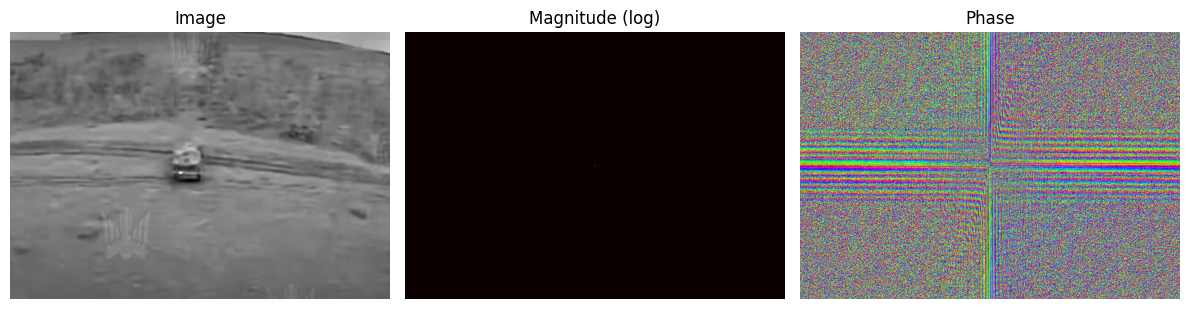

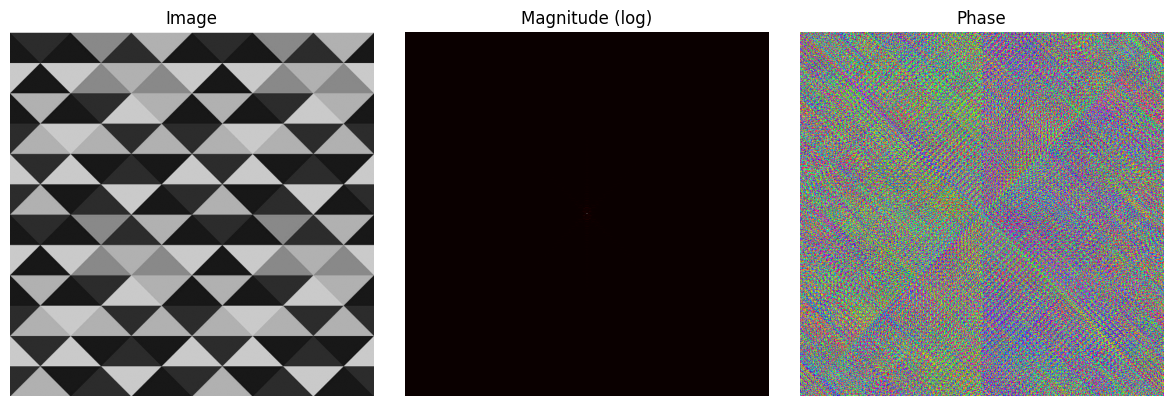

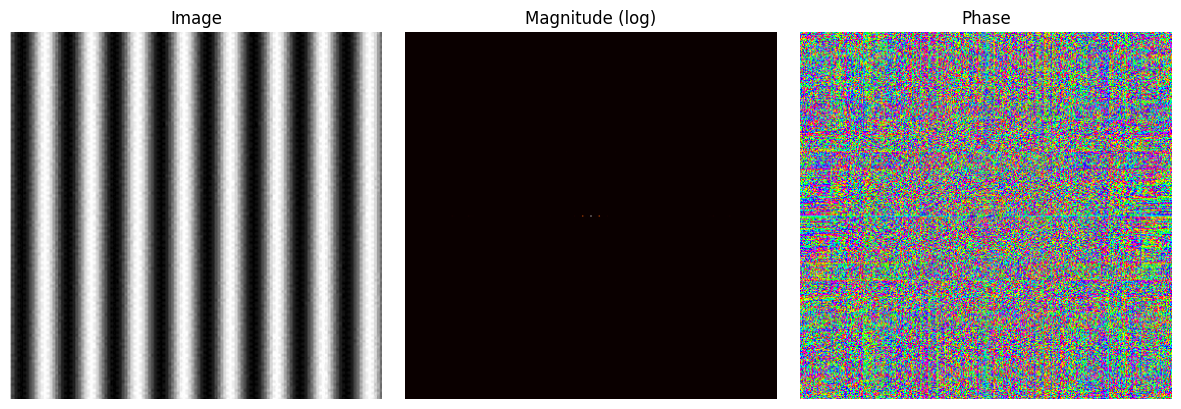

In [7]:
for (_, im) in images:
    quick_fft_analysis(im)


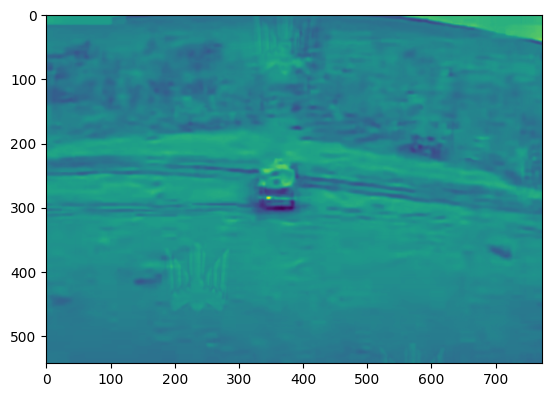

In [8]:
# playing with DC
fft_image = np.fft.fft2(vehicle)
plt.imshow(vehicle)

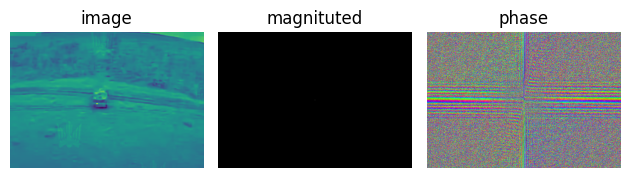

In [9]:
mag, phase, fft_image, fft_shifted = analyze_image_spectrum(vehicle)
fix, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(vehicle)
ax1.set_title('image')
ax1.axis('off')

ax2.imshow(mag, cmap='gray')
ax2.set_title('magnituted')
ax2.axis('off')

ax3.imshow(phase, cmap='hsv')
ax3.set_title('phase')
ax3.axis('off')

plt.tight_layout()
plt.show()


In [37]:
def get_region(image: np.ndarray, fft_shifted: np.ndarray, mask_radius: int = 20, mode: typing.Literal['low', 'high'] = 'low') -> None:
    center_y, center_x = np.array(fft_shifted.shape) // 2
    x,y = np.ogrid[:fft_shifted.shape[0], :fft_shifted.shape[1]]
    distance_from_center = np.sqrt(( x - center_x ) ** 2 + (y - center_y) ** 2)
    
    mask = distance_from_center <= mask_radius if mode =='low' else distance_from_center >= mask_radius
    lf_magnitude = np.abs(fft_shifted[mask])
    print(f'LF mean magnitude: {np.mean(lf_magnitude)}')
    print(f'LF mean max: {np.max(lf_magnitude)}')





In [39]:
get_region(vehicle, fft_shifted, mode='high')

LF mean magnitude: 971.9944875202905
LF mean max: 33113512.999999996


In [ ]:
get_region(vehicle, fft_shifted, mode='high')

LF mean magnitude: 264.12165539403895
LF mean max: 952.6247847466278


In [ ]:
"""
3. **Frequency domain interpretation:**
   - Identify DC component (average intensity)
   - Low frequency regions (smooth variations)
   - Directional frequency content
"""
np.mean(fft_image)

np.complex128(59.3222836095764-1.2711952547657423e-14j)

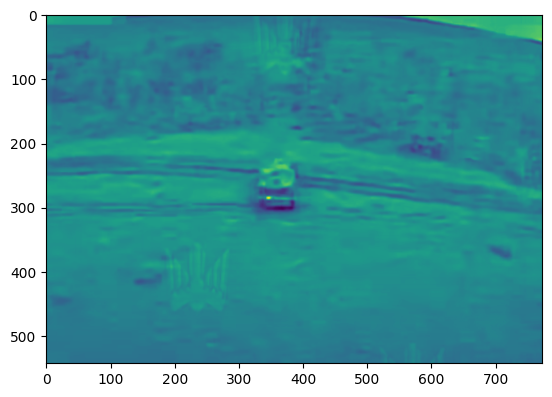

In [70]:
# reconstruct from magnitude
mag_img = np.fft.ifft2(fft_image)

plt.imshow(np.real(mag_img))

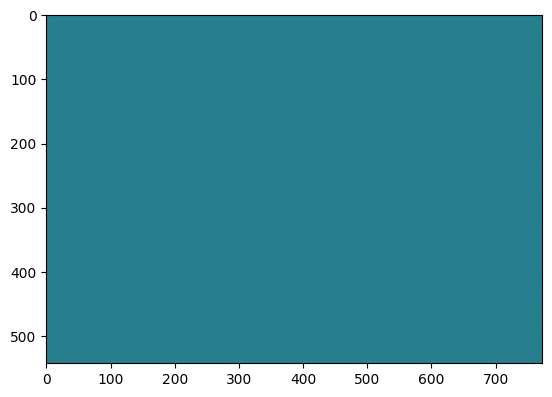

In [82]:
# reconstruct from magnitude
mag_img = np.abs(fft_image)

# to reconstruct let's assume 0 phase 
zero_phase = mag_img * np.exp(1j*0)

zero_image = np.fft.ifft2(np.fft.ifftshift(zero_phase))

plt.imshow(zero_image.real)
# zero_image[0]




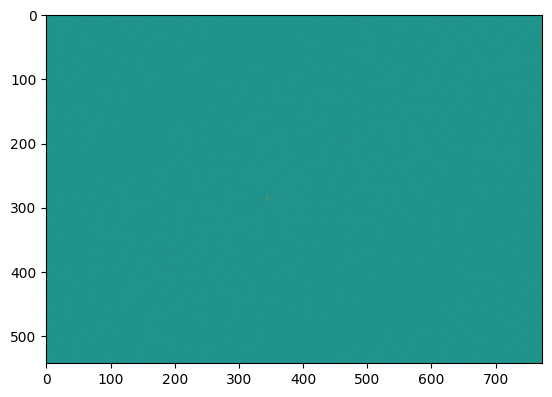

In [81]:
# reconstruct from magnitude
phase = np.angle(fft_image)

# to reconstruct let's assume 0 phase 
zero_phase = np.exp(1j*phase)

zero_image = np.fft.ifft2(np.fft.ifftshift(zero_phase))

plt.imshow(zero_image.real)
# zero_image[0]




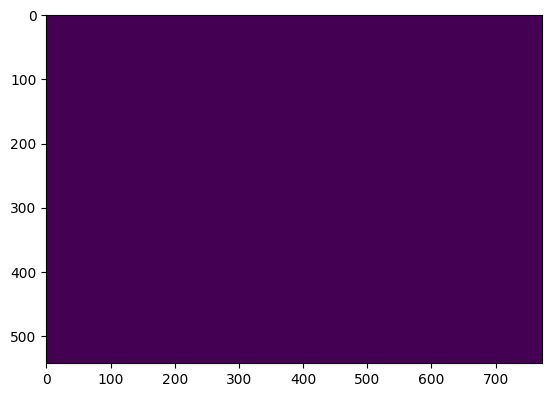

In [ ]:
magnitude = np.abs(fft_image)
phase = np.angle(fft_image)

plt.imshow(magnitude)



In [85]:
vehicle.shape, geo_pattern.shape

((543, 773), (627, 625))

(543, 773) (543, 773)


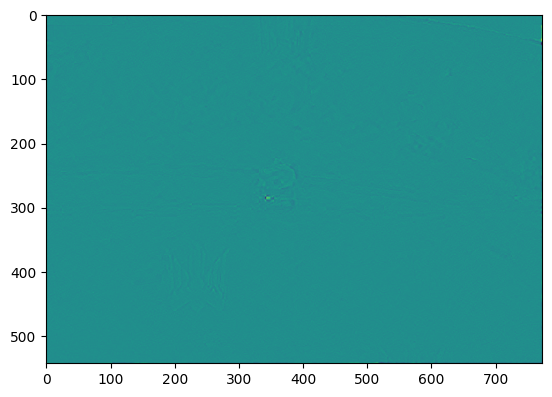

In [93]:

geo_resized = cv.resize(geo_pattern, (vehicle.shape[1], vehicle.shape[0]), interpolation=cv.INTER_LINEAR)

print(geo_resized.shape, vehicle.shape)
mag_v, phase_v, *_ = analyze_image_spectrum(vehicle)
mag_g, phase_g, *_ = analyze_image_spectrum(geo_resized)


hybrid = np.fft.ifftshift(mag_g * np.exp(1j * phase_v))

hybrid_image = np.fft.ifft2(hybrid).real
plt.imshow(hybrid_image)
